In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Observing and cleaning the data

In [2]:
data = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [5]:
# removing row with "Other" gender
data = data.drop(data[data['gender']=='Other'].index)

In [6]:
# removing id column
data = data.drop('id', axis=1)

In [7]:
data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [8]:
# counting rows with null values in it
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# filling null values in bmi column with the bmi mean
data['bmi'] = data['bmi'].fillna(round(data['bmi'].mean(), 2))

In [10]:
# checking for nulls again
data['bmi'].isnull().sum()

0

In [11]:
# creating new dataframe with stroke and no stroke counts (0 = no stroke, 1 = stroke)
stroke_count_df = pd.DataFrame(data.groupby('stroke')['stroke'].count())
stroke_count_df

,stroke
stroke,
0,4860
1,249


C:\Users\Peter\Documents\Workspace\aai\aai-mandatory-1\.venv\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


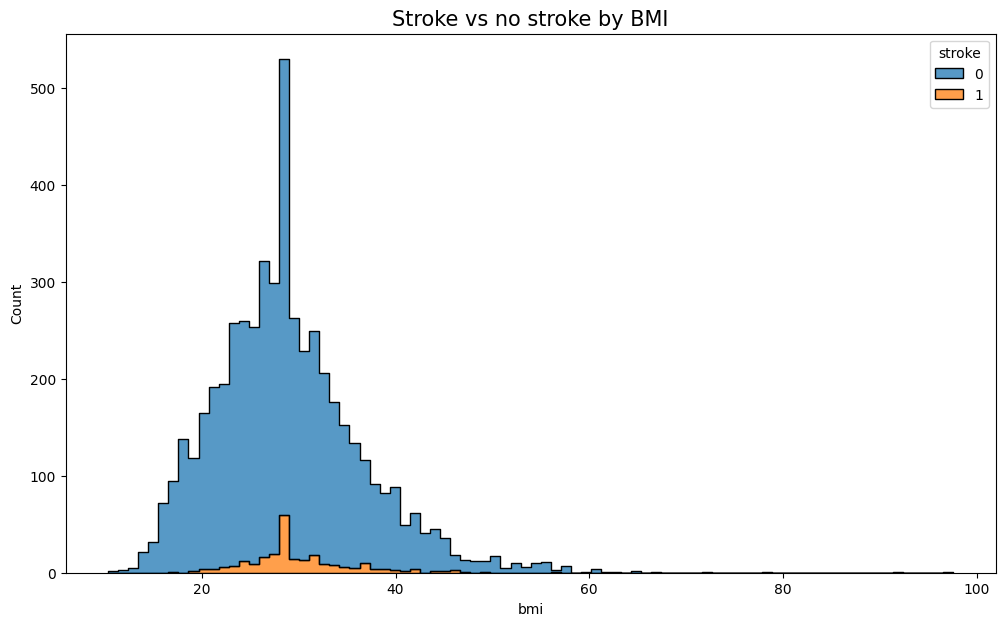

In [12]:
# plotting density distribution of bmi for stroke and no-stroke 
plt.figure(figsize=(12,7))
seaborn.histplot(
    data, x="bmi", hue="stroke",
    element="step",
    multiple='stack'
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

C:\Users\Peter\Documents\Workspace\aai\aai-mandatory-1\.venv\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


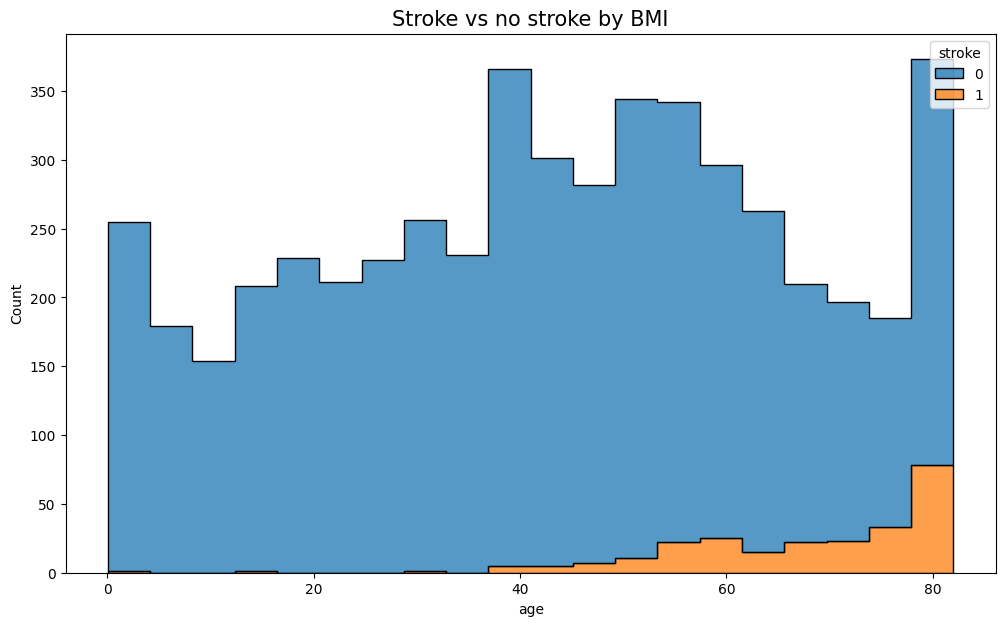

In [13]:
# plotting density distribution of bmi for stroke and no-stroke 
plt.figure(figsize=(12,7))
seaborn.histplot(
    data, x="age", hue="stroke",
    element="step",
    multiple='stack'
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

C:\Users\Peter\Documents\Workspace\aai\aai-mandatory-1\.venv\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


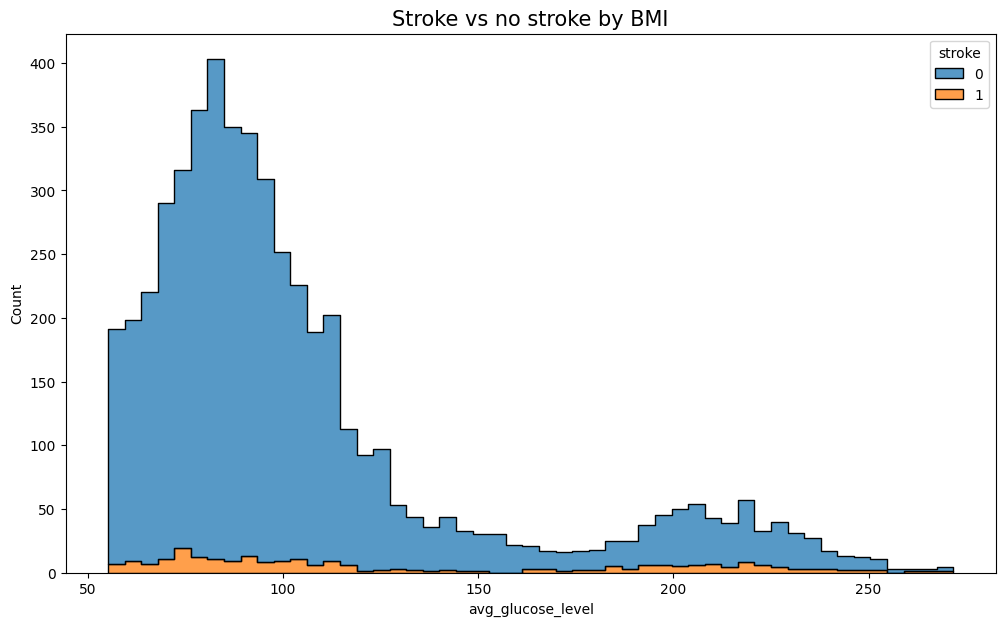

In [14]:
# plotting density distribution of bmi for stroke and no-stroke 
plt.figure(figsize=(12,7))
seaborn.histplot(
    data, x="avg_glucose_level", hue="stroke",
    element="step",
    multiple='stack'
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

In [15]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [16]:
obj_cols=['gender', 'ever_married', 'Residence_type']

lb=LabelEncoder()

for i in obj_cols:
    print(f"Value Counts of column:{i}")
    print(data.loc[:,i].value_counts())
    data[i] = lb.fit_transform(data[i])
    print("The classes which labeled from 0 are: ",lb.classes_,end="\n===========================================\n")

Value Counts of column:gender
Female    2994
Male      2115
Name: gender, dtype: int64
The classes which labeled from 0 are:  ['Female' 'Male']
Value Counts of column:ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64
The classes which labeled from 0 are:  ['No' 'Yes']
Value Counts of column:Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
The classes which labeled from 0 are:  ['Rural' 'Urban']


In [17]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.60,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.89,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.50,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.40,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.00,never smoked,1


In [18]:
def run_spearmanr(a):
    r = stats.spearmanr(a=data[a], b=data['stroke'])
    print(f'Spearmanr results for correlation between {a} and stroke')
    print('Correlation: {:f}'.format(r.correlation))
    print('P-value: {:f}'.format(r.pvalue))

In [19]:
run_spearmanr('bmi')

Spearmanr results for correlation between bmi and stroke
Correlation: 0.054964
P-value: 0.000085


In [20]:
run_spearmanr('age')

Spearmanr results for correlation between age and stroke
Correlation: 0.249530
P-value: 0.000000


In [21]:
run_spearmanr('avg_glucose_level')

Spearmanr results for correlation between avg_glucose_level and stroke
Correlation: 0.082585
P-value: 0.000000


In [22]:
run_spearmanr('gender')

Spearmanr results for correlation between gender and stroke
Correlation: 0.009081
P-value: 0.516396


In [23]:
run_spearmanr('ever_married')

Spearmanr results for correlation between ever_married and stroke
Correlation: 0.108299
P-value: 0.000000


In [24]:
run_spearmanr('hypertension')

Spearmanr results for correlation between hypertension and stroke
Correlation: 0.127891
P-value: 0.000000


In [25]:
run_spearmanr('heart_disease')

Spearmanr results for correlation between heart_disease and stroke
Correlation: 0.134905
P-value: 0.000000


In [26]:
run_spearmanr('Residence_type')

Spearmanr results for correlation between Residence_type and stroke
Correlation: 0.015415
P-value: 0.270641


In [27]:
data = pd.get_dummies(data)

In [28]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.60,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.89,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.50,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.40,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.00,1,0,0,0,1,0,0,0,1,0


In [29]:
print(stats.spearmanr(a=data['smoking_status_smokes'],b=data['stroke']))

SpearmanrResult(correlation=0.008920477479368813, pvalue=0.5238200265767476)


# Data resambling to improve imbalanced data

0    4860
1     249
Name: stroke, dtype: int64


<AxesSubplot: >

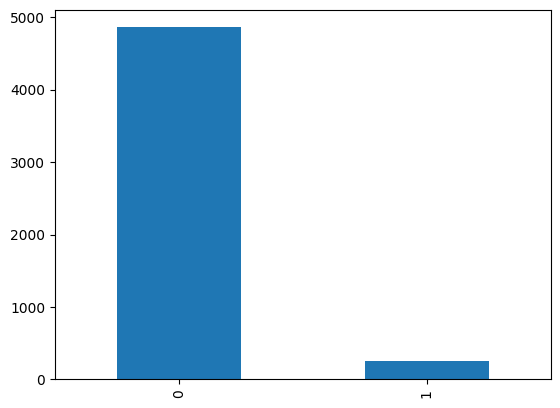

In [30]:
print(data['stroke'].value_counts())
data['stroke'].value_counts().sort_index().plot.bar()

In [31]:
y = data['stroke']
X = data.drop('stroke', axis=1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2022, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3831, 17) (1278, 17)
(3831,) (1278,)


In [33]:
# scaling data as it will impact performance on SGD (won't do anything for Random Forest)
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
print('Stroke counts before resampling:')
print(pd.DataFrame(y_train, columns=['stroke']).value_counts())

Stroke counts before resampling:
stroke
0         3644
1          187
dtype: int64


In [35]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=2022)
X_train, y_train = oversample.fit_resample(X_train, y_train.ravel())
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7288, 17) (1278, 17)
(7288,) (1278,)


In [36]:
print('Stroke counts after resampling:')
print(pd.DataFrame(y_train, columns=['stroke']).value_counts())

Stroke counts after resampling:
stroke
0         3644
1         3644
dtype: int64


In [37]:
X_train_bmi = np.array(X_train[:, [data.columns.get_loc('bmi')]]).reshape(-1, 1)
X_test_bmi  = np.array(X_test[:, [data.columns.get_loc('bmi')]]).reshape(-1, 1)
print(X_train_bmi.shape)
print(X_test_bmi.shape)

(7288, 1)
(1278, 1)


# Preparing model evaluation functions

In [38]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [39]:
def plot_conf_mat(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)

    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ['{0:0.0f}'.format(value) for value in conf_mat.flatten()]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(8,8))
    seaborn.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')
    plt.show()

In [40]:
def report_performance(y_test, y_pred):
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'AUC score: {roc_auc}')

In [41]:
def feature_importance(model):
    return pd.DataFrame({'Feature':X.columns, 'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

# Stochastic Gradient Descent Classifier

In [42]:
from sklearn.linear_model import SGDClassifier

## Single feature (BMI)

In [43]:
model = SGDClassifier()
model.fit(X_train_bmi, y_train)

SGDClassifier()

In [44]:
y_pred = model.predict(X_test_bmi)

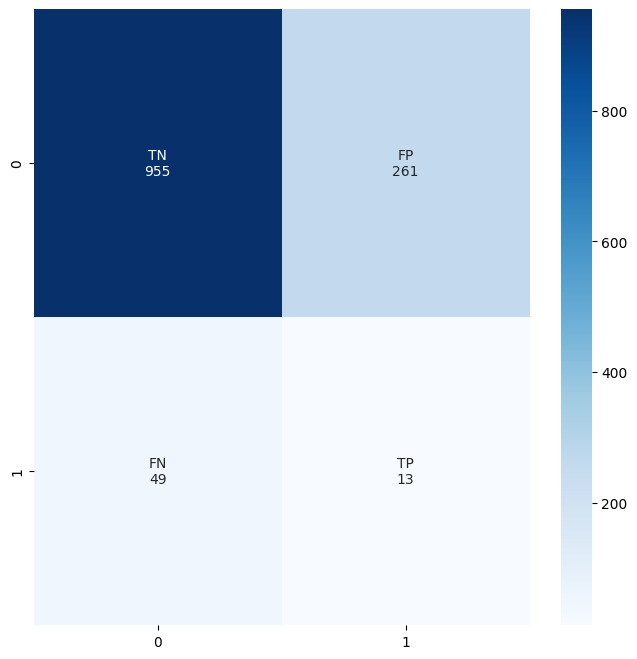

In [45]:
plot_conf_mat(y_test, y_pred)

In [46]:
report_performance(y_test, y_pred)

AUC score: 0.49751963073005095


## All features

In [47]:
del model
model = SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier()

In [48]:
y_pred = model.predict(X_test)

In [49]:
print(X_train.shape)

(7288, 17)


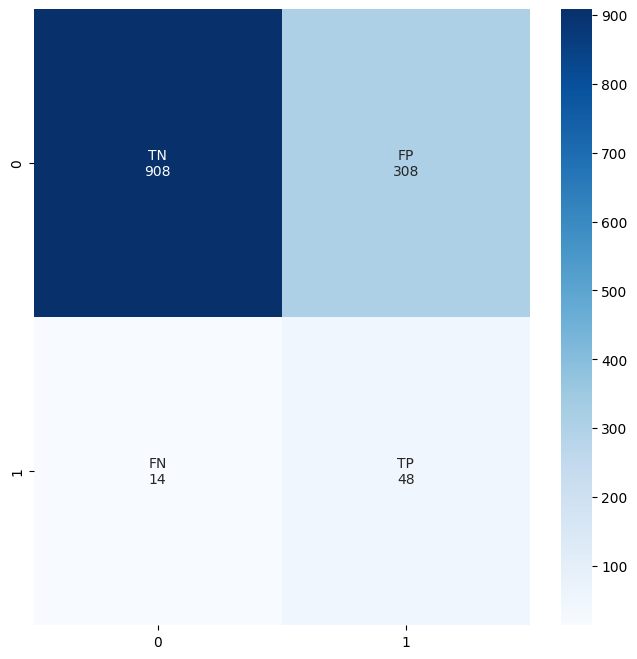

In [50]:
plot_conf_mat(y_test, y_pred)

In [51]:
report_performance(y_test, y_pred)

AUC score: 0.7604520373514431


# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

## Single feature (BMI)

In [53]:
del model
model = LogisticRegression(max_iter=300)
model.fit(X_train_bmi, y_train)

LogisticRegression(max_iter=300)

In [54]:
y_pred = model.predict(X_test_bmi)

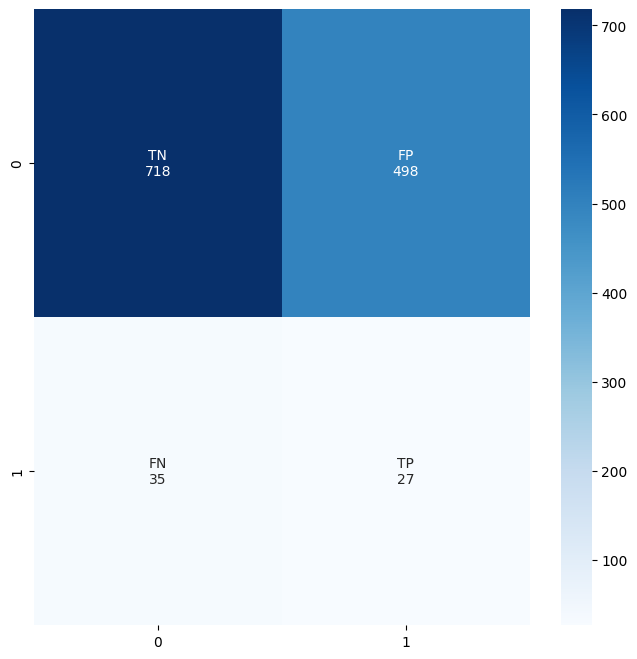

In [55]:
plot_conf_mat(y_test, y_pred)

In [56]:
report_performance(y_test, y_pred)

AUC score: 0.5129721986417657


## All features

In [57]:
del model
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [58]:
y_pred = model.predict(X_test)

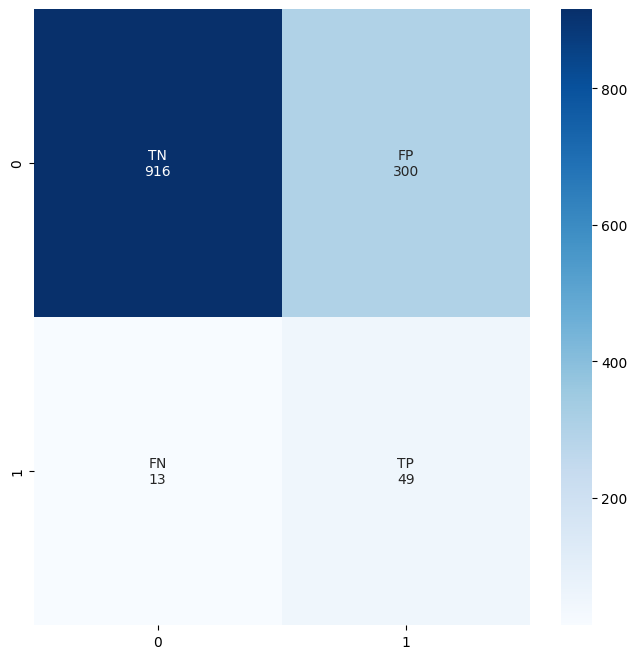

In [59]:
plot_conf_mat(y_test, y_pred)

In [60]:
report_performance(y_test, y_pred)

AUC score: 0.7718060271646858


# Decision Tree Classification

In [61]:
from sklearn.tree import DecisionTreeClassifier

## Single feature (BMI)

In [62]:
del model
model = DecisionTreeClassifier()
model.fit(X_train_bmi, y_train)

DecisionTreeClassifier()

In [63]:
y_pred = model.predict(X_test_bmi)

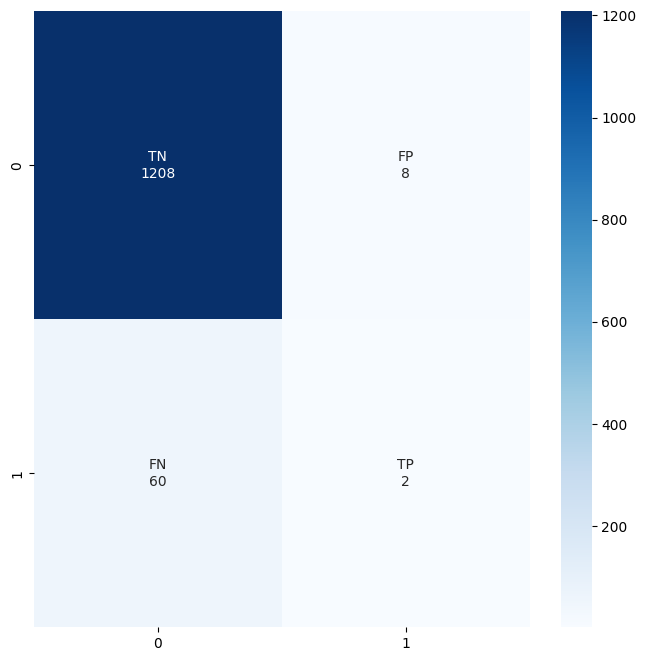

In [64]:
plot_conf_mat(y_test, y_pred)

In [65]:
report_performance(y_test, y_pred)

AUC score: 0.512839558573854


## All features

In [66]:
del model
model = DecisionTreeClassifier(random_state=2022)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [67]:
y_pred = model.predict(X_test)

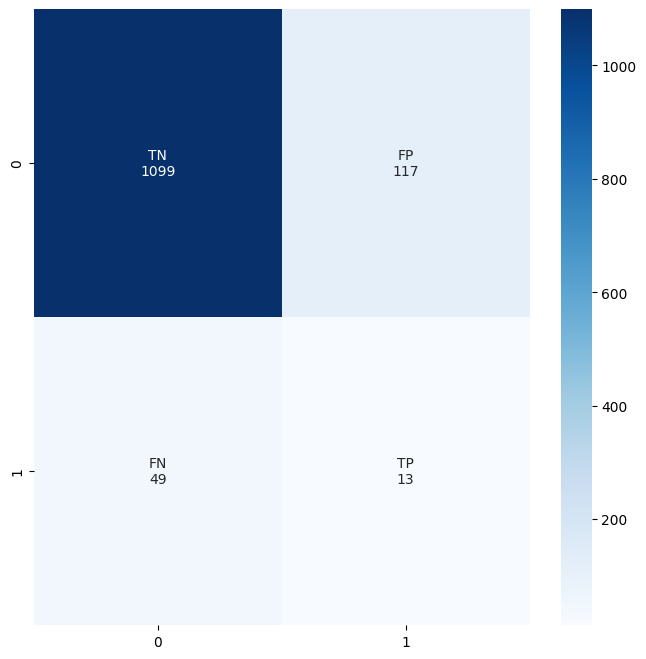

In [68]:
plot_conf_mat(y_test, y_pred)

In [69]:
report_performance(y_test, y_pred)

AUC score: 0.5567301570458405


In [70]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


In [71]:
fi = feature_importance(model)
fi.style.background_gradient(cmap='Blues')

,Feature,Importance
1,age,0.547013
6,avg_glucose_level,0.133787
7,bmi,0.111734
0,gender,0.042041
5,Residence_type,0.021429
10,work_type_Private,0.021347
4,ever_married,0.018497
2,hypertension,0.014404
3,heart_disease,0.013871
14,smoking_status_formerly smoked,0.013693


# Random Forest Classification

In [72]:
from sklearn.ensemble import RandomForestClassifier

## Single feature (BMI)

In [73]:
del model
model = RandomForestClassifier()
model.fit(X_train_bmi, y_train)

RandomForestClassifier()

In [74]:
y_pred = model.predict(X_test_bmi)

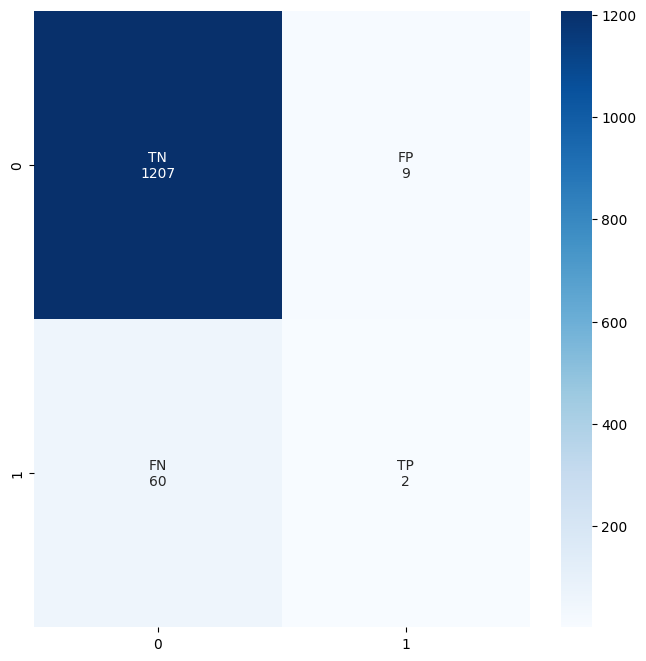

In [75]:
plot_conf_mat(y_test, y_pred)

In [76]:
report_performance(y_test, y_pred)

AUC score: 0.5124283743633277


## All features

In [77]:
del model
model = RandomForestClassifier(random_state=2022)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=2022)

In [78]:
y_pred = model.predict(X_test)

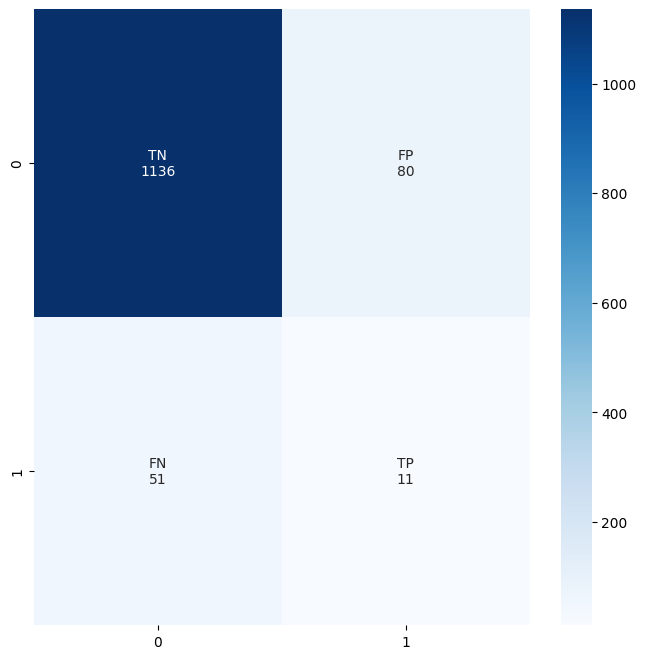

In [79]:
plot_conf_mat(y_test, y_pred)

In [80]:
report_performance(y_test, y_pred)

AUC score: 0.5558149405772496


In [81]:
fi = feature_importance(model)
fi.style.background_gradient(cmap='Blues')

,Feature,Importance
1,age,0.382909
7,bmi,0.143770
6,avg_glucose_level,0.142750
4,ever_married,0.059908
2,hypertension,0.041717
0,gender,0.038829
5,Residence_type,0.035214
3,heart_disease,0.027074
10,work_type_Private,0.020792
15,smoking_status_never smoked,0.017111


In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
del model
model = GradientBoostingClassifier(random_state=2022)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=2022)

In [84]:
y_pred = model.predict(X_test)

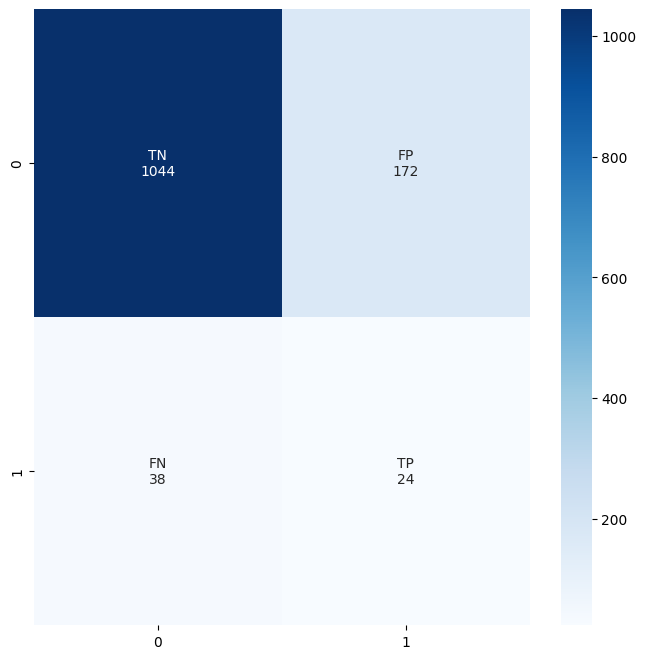

In [85]:
plot_conf_mat(y_test, y_pred)

In [86]:
report_performance(y_test, y_pred)

AUC score: 0.6228247028862479


In [87]:
fi = feature_importance(model)
fi.style.background_gradient(cmap='Blues')

,Feature,Importance
1,age,0.682086
6,avg_glucose_level,0.060738
7,bmi,0.054162
0,gender,0.039641
5,Residence_type,0.035251
2,hypertension,0.031207
3,heart_disease,0.025570
10,work_type_Private,0.017540
8,work_type_Govt_job,0.015813
4,ever_married,0.012335


# DNN (Deep Neural Network)

# Splitting data again to get validation data for a DNN

In [88]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(X_train.shape, X_val_test.shape)
print(y_train.shape, y_val_test.shape)

(3576, 17) (1533, 17)
(3576,) (1533,)


In [89]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_val_test = sc.transform(X_val_test)

In [90]:
print(X_train.shape)

(3576, 17)


In [91]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.50, random_state=42, stratify=y_val_test)

In [92]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=2022)
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel())

In [93]:
# single feature extraction
X_train_bmi = np.array(X_train[:, [data.columns.get_loc('bmi')]]).reshape(-1, 1)
X_val_bmi =  np.array(X_val[:, [data.columns.get_loc('bmi')]]).reshape(-1, 1)
X_test_bmi =  np.array(X_test[:, [data.columns.get_loc('bmi')]]).reshape(-1, 1)

# single feature extraction with oversampling
X_train_res_bmi = np.array(X_train_res[:, [data.columns.get_loc('bmi')]]).reshape(-1, 1)

In [94]:
print(pd.DataFrame(y_train, columns=['stroke']).value_counts())
print(pd.DataFrame(y_val, columns=['stroke']).value_counts())
print(pd.DataFrame(y_test, columns=['stroke']).value_counts())

stroke
0         3402
1          174
dtype: int64
stroke
0         729
1          37
dtype: int64
stroke
0         729
1          38
dtype: int64


## Imports and utility functions

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC
from keras.regularizers import l2
auc = AUC(name = 'auc')

In [96]:
def plot_history(history):
    n_epoch = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12,6))

    seaborn.lineplot(data=history.history, x=n_epoch, y='auc', label='auc')
    seaborn.lineplot(data=history.history, x=n_epoch, y='val_auc', label='val_auc')
    seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')

    plt.legend()
    plt.ylim([0,1])
    plt.ylabel(None)
    plt.show()

## Single feature (BMI)

In [97]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(1,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
        metrics=[auc])

In [98]:
epochs = 30

In [99]:
history = model.fit(X_train_bmi, y_train,
             validation_data=(X_val_bmi, y_val),
             epochs=epochs,
             batch_size=32)

Epoch 1/30
112/112 [==============================] - 1s 2ms/step - loss: 0.3147 - auc: 0.4854 - val_loss: 0.2035 - val_auc: 0.4277
Epoch 2/30
112/112 [==============================] - 0s 1ms/step - loss: 0.2022 - auc: 0.4532 - val_loss: 0.1998 - val_auc: 0.4390
Epoch 3/30
112/112 [==============================] - 0s 1ms/step - loss: 0.2000 - auc: 0.4190 - val_loss: 0.1989 - val_auc: 0.4283
Epoch 4/30
112/112 [==============================] - 0s 1ms/step - loss: 0.1997 - auc: 0.4414 - val_loss: 0.1971 - val_auc: 0.4346
Epoch 5/30
112/112 [==============================] - 0s 1ms/step - loss: 0.1982 - auc: 0.4637 - val_loss: 0.1961 - val_auc: 0.4333
Epoch 6/30
112/112 [==============================] - 0s 1ms/step - loss: 0.1971 - auc: 0.4626 - val_loss: 0.1950 - val_auc: 0.4313
Epoch 7/30
112/112 [==============================] - 0s 1ms/step - loss: 0.1952 - auc: 0.5338 - val_loss: 0.1962 - val_auc: 0.4991
Epoch 8/30
112/112 [==============================] - 0s 1ms/step - loss: 0.

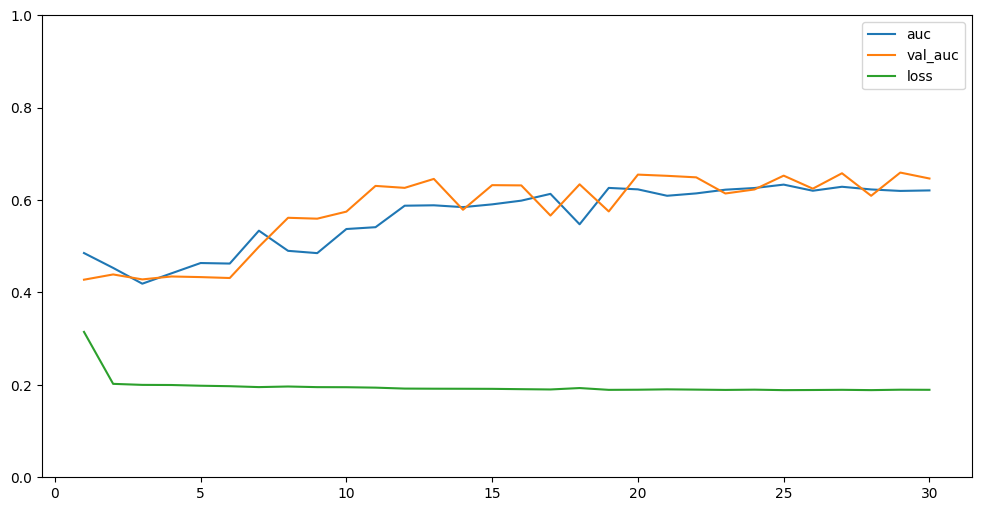

In [100]:
plot_history(history)

In [101]:
model.evaluate(X_test_bmi, y_test)

24/24 [==============================] - 0s 740us/step - loss: 0.1984 - auc: 0.5522


[0.19840016961097717, 0.5521984100341797]

## All features  

In [102]:
del model
del history

In [103]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(17,)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=[auc])

In [104]:
epochs = 150

In [105]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=epochs,
             batch_size=32)

Epoch 1/150
112/112 [==============================] - 1s 2ms/step - loss: 0.9627 - auc: 0.4902 - val_loss: 0.5602 - val_auc: 0.3310
Epoch 2/150
112/112 [==============================] - 0s 1ms/step - loss: 0.5123 - auc: 0.4490 - val_loss: 0.3951 - val_auc: 0.3807
Epoch 3/150
112/112 [==============================] - 0s 1ms/step - loss: 0.3995 - auc: 0.4721 - val_loss: 0.3178 - val_auc: 0.4695
Epoch 4/150
112/112 [==============================] - 0s 1ms/step - loss: 0.3286 - auc: 0.5361 - val_loss: 0.2753 - val_auc: 0.5346
Epoch 5/150
112/112 [==============================] - 0s 1ms/step - loss: 0.2859 - auc: 0.5900 - val_loss: 0.2496 - val_auc: 0.5772
Epoch 6/150
112/112 [==============================] - 0s 1ms/step - loss: 0.2675 - auc: 0.5694 - val_loss: 0.2340 - val_auc: 0.6644
Epoch 7/150
112/112 [==============================] - 0s 1ms/step - loss: 0.2554 - auc: 0.5711 - val_loss: 0.2211 - val_auc: 0.6781
Epoch 8/150
112/112 [==============================] - 0s 1ms/step - 

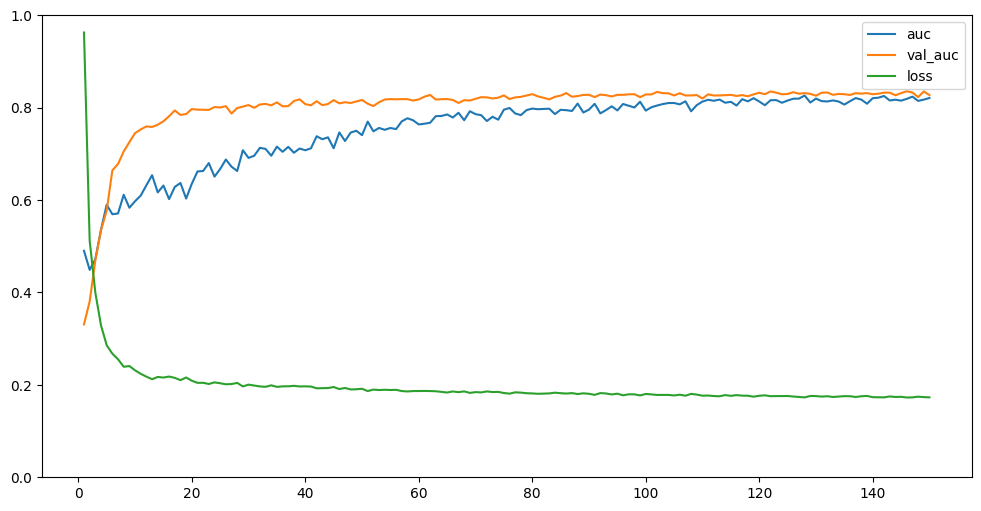

In [106]:
plot_history(history)

In [107]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 653us/step - loss: 0.1719 - auc: 0.8361


[0.17186638712882996, 0.8360587358474731]

## Single feature with oversampling (BMI)

In [108]:
del model
del history

In [109]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(1,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
        metrics=[auc])

In [110]:
epochs = 30

In [111]:
history = model.fit(X_train_res_bmi, y_train_res,
             validation_data=(X_val_bmi, y_val),
             epochs=epochs,
             batch_size=32)

Epoch 1/30
213/213 [==============================] - 1s 2ms/step - loss: 0.6854 - auc: 0.6373 - val_loss: 0.7030 - val_auc: 0.6272
Epoch 2/30
213/213 [==============================] - 0s 948us/step - loss: 0.6335 - auc: 0.6737 - val_loss: 0.6633 - val_auc: 0.6304
Epoch 3/30
213/213 [==============================] - 0s 944us/step - loss: 0.6306 - auc: 0.6725 - val_loss: 0.6943 - val_auc: 0.6429
Epoch 4/30
213/213 [==============================] - 0s 934us/step - loss: 0.6267 - auc: 0.6805 - val_loss: 0.6132 - val_auc: 0.6493
Epoch 5/30
213/213 [==============================] - 0s 963us/step - loss: 0.6263 - auc: 0.6810 - val_loss: 0.6793 - val_auc: 0.6338
Epoch 6/30
213/213 [==============================] - 0s 966us/step - loss: 0.6262 - auc: 0.6834 - val_loss: 0.6903 - val_auc: 0.6408
Epoch 7/30
213/213 [==============================] - 0s 940us/step - loss: 0.6262 - auc: 0.6812 - val_loss: 0.6656 - val_auc: 0.6414
Epoch 8/30
213/213 [==============================] - 0s 959us/s

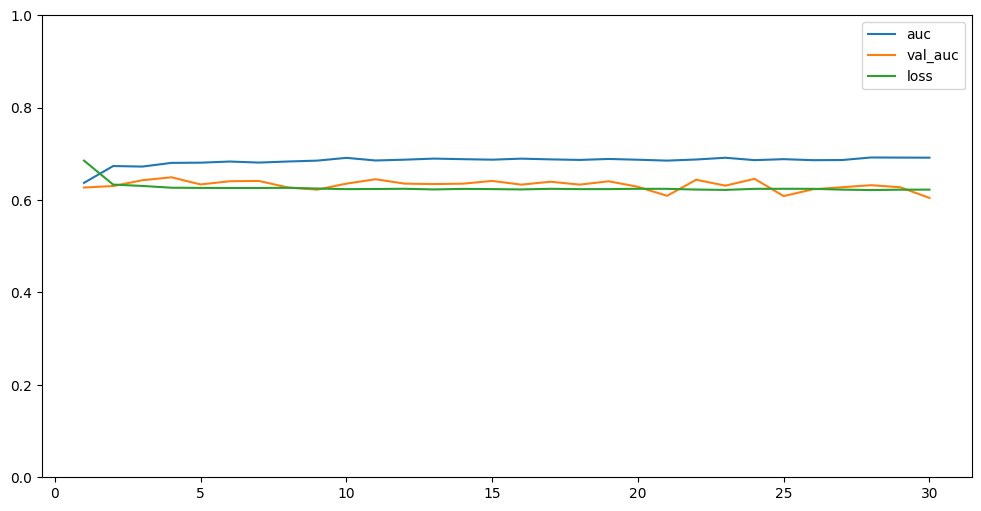

In [112]:
plot_history(history)

In [113]:
model.evaluate(X_test_bmi, y_test)

24/24 [==============================] - 0s 696us/step - loss: 0.6446 - auc: 0.5430


[0.6445833444595337, 0.5429751873016357]

## All features with oversampling

In [114]:
del model
del history

In [115]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(17,)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=[auc])

In [116]:
epochs = 150

In [117]:
history = model.fit(X_train_res, y_train_res,
             validation_data=(X_val, y_val),
             epochs=epochs,
             batch_size=32)

Epoch 1/150
213/213 [==============================] - 1s 1ms/step - loss: 0.9219 - auc: 0.6302 - val_loss: 0.7852 - val_auc: 0.7000
Epoch 2/150
213/213 [==============================] - 0s 869us/step - loss: 0.6920 - auc: 0.7758 - val_loss: 0.6290 - val_auc: 0.8022
Epoch 3/150
213/213 [==============================] - 0s 864us/step - loss: 0.6006 - auc: 0.8251 - val_loss: 0.5028 - val_auc: 0.8145
Epoch 4/150
213/213 [==============================] - 0s 864us/step - loss: 0.5700 - auc: 0.8318 - val_loss: 0.5323 - val_auc: 0.8244
Epoch 5/150
213/213 [==============================] - 0s 855us/step - loss: 0.5426 - auc: 0.8456 - val_loss: 0.5621 - val_auc: 0.8284
Epoch 6/150
213/213 [==============================] - 0s 859us/step - loss: 0.5320 - auc: 0.8490 - val_loss: 0.5103 - val_auc: 0.8308
Epoch 7/150
213/213 [==============================] - 0s 892us/step - loss: 0.5233 - auc: 0.8491 - val_loss: 0.5508 - val_auc: 0.8305
Epoch 8/150
213/213 [==============================] - 0s

In [ ]:
plot_history(history)

In [ ]:
model.evaluate(X_test, y_test)